# <center>Chips Sales Analysis Task 1: Data Wrangling</center>

## 1. Data Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

purchase_behavior = pd.read_csv(r"C:\Users\thang\OneDrive\Desktop\Chips Analysis\2. Data Sources\Raw\QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel(r"C:\Users\thang\OneDrive\Desktop\Chips Analysis\2. Data Sources\Raw\QVI_transaction_data.xlsx")

In [4]:
purchase_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
purchase_behavior

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [8]:
## Copy the original dataframes before cleaning to preserve the original data. 
purchase_behavior_clean = purchase_behavior.copy()
transaction_data_clean = transaction_data.copy()

## 2. Data Cleaning

### Drop Duplicates

In [11]:
f'{purchase_behavior_clean.duplicated().sum()} duplicates in Purchase Behavior Table'

'0 duplicates in Purchase Behavior Table'

In [12]:
f'{transaction_data_clean.duplicated().sum()} duplicates in Transaction Data Table'

'1 duplicates in Transaction Data Table'

In [13]:
# Drop the duplicates
transaction_data_clean.drop_duplicates(inplace = True)

#### Summary

- Purchase_Behavior table: dropped 0 duplicates. </br>
- Transaction_Data table: dropped 1 duplicate.

### Drop & Rename Columns

In [16]:
purchase_behavior_clean

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [17]:
# No columns are to be dropped
# Rename Columns
purchase_behavior_clean.rename(columns = {'LYLTY_CARD_NBR':'Loyalty_Card_Number', 'LIFESTAGE':'Family_Status','PREMIUM_CUSTOMER':'Customer_Type'}, inplace = True)

In [18]:
transaction_data_clean

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [19]:
# Drop TXN_ID and PROD_NBR
transaction_data_clean.drop(columns = ['TXN_ID','PROD_NBR'], inplace = True)

In [20]:
# Rename Columns
transaction_data_clean.rename(
    columns = {'DATE':'Date','STORE_NBR':'Store_Number','LYLTY_CARD_NBR':'Loyalty_Card_Number', 'PROD_NAME':'Product_Name', 'PROD_QTY':'Product_Quantity','TOT_SALES':'Total_Sales'}, 
    inplace = True)

#### Summary

Purchase_Behavior table:
- Dropped 0 columns from Purchase_Behavior table
- Renamed 3 columns
  
Transcation_Data table: 
- Dropped "TXN_ID" column
- Dropped "PROD_NBR" column
- Renamed 6 columns


### Convert Data Types

In [23]:
purchase_behavior_clean.dtypes

Loyalty_Card_Number     int64
Family_Status          object
Customer_Type          object
dtype: object

In [24]:
# Change Family_Status and Customer_Type from Object to Category type
purchase_behavior_clean = purchase_behavior_clean.astype({'Family_Status': 'category', 'Customer_Type': 'category'})

In [25]:
transaction_data_clean.dtypes

Date                   datetime64[ns]
Store_Number                    int64
Loyalty_Card_Number             int64
Product_Name                   object
Product_Quantity                int64
Total_Sales                   float64
dtype: object

In [26]:
# Change Date from Int64 to Datetime64 type 
# This step is needed only if the dates are in int64 type after importing the data; the dates are not auto converted. 
# Conversion will use origin = '1900-01-01' (common origin for Excel on Windows systems)and unit = Days to show the correct date format and type. 

# transaction_data_clean['Date'] = pd.to_datetime(transaction_data_clean['Date'], origin='1900-01-01', unit='D')

#### Summary

- Purchase_Behavior table: converted "Family_Status" and "Customer_Type" columns from Object to Category type. </br>
- Transcation_Data table: converted 0 column.

### Standardize Formats

In [29]:
purchase_behavior_clean

,Loyalty_Card_Number,Family_Status,Customer_Type
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [30]:
# Let's find if each colum has redundant values that need to be fixed except ID values
# Then find any characters that needs to be replaced or removed. 
for col in purchase_behavior_clean.columns:
    if col != 'Loyalty_Card_Number':
        print(f"'{col}': {purchase_behavior_clean[col].unique()}")

'Family_Status': ['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 'RETIREES']
Categories (7, object): ['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES', 'YOUNG SINGLES/COUPLES']
'Customer_Type': ['Premium', 'Mainstream', 'Budget']
Categories (3, object): ['Budget', 'Mainstream', 'Premium']


In [31]:
# Transaction data is okay to be left as is because there is no categorial data and repeats are expected.
transaction_data_clean

,Date,Store_Number,Loyalty_Card_Number,Product_Name,Product_Quantity,Total_Sales
0,2018-10-17,1,1000,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...
264831,2019-03-09,272,272319,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [32]:
# Remove white spaces in Product_Name
transaction_data_clean["Product_Name"] = transaction_data_clean["Product_Name"].str.strip()

In [33]:
# Change how the float values are displayed (2 decimal places) for consistency.
pd.options.display.float_format = '{:,.2f}'.format

#### Summary

Purchase_Behavior table: 
- No issues.

Transcation_Data table:
- Removed white spaces in Product_Name
- Changed float to display 2 decimal points. 

### Blanks / Nulls

In [36]:
purchase_behavior_clean.replace("", np.nan).isna().sum()

Loyalty_Card_Number    0
Family_Status          0
Customer_Type          0
dtype: int64

In [37]:
transaction_data_clean.replace('', np.nan).isna().sum()

Date                   0
Store_Number           0
Loyalty_Card_Number    0
Product_Name           0
Product_Quantity       0
Total_Sales            0
dtype: int64

#### Summary

- Both tables: no blanks or nulls

### Outliers

In [40]:
purchase_behavior_clean.describe()

,Loyalty_Card_Number
count,"72,637.00"
mean,"136,185.93"
std,"89,892.93"
min,"1,000.00"
25%,"66,202.00"
50%,"134,040.00"
75%,"203,375.00"
max,"2,373,711.00"


In [41]:
transaction_data_clean.describe()

,Date,Store_Number,Loyalty_Card_Number,Product_Quantity,Total_Sales
count,264835,"264,835.00","264,835.00","264,835.00","264,835.00"
mean,2018-12-30 00:52:42.252722944,135.08,"135,549.58",1.91,7.30
min,2018-07-01 00:00:00,1.00,"1,000.00",1.00,1.50
25%,2018-09-30 00:00:00,70.00,"70,021.00",2.00,5.40
50%,2018-12-30 00:00:00,130.00,"130,358.00",2.00,7.40
75%,2019-03-31 00:00:00,203.00,"203,094.50",2.00,9.20
max,2019-06-30 00:00:00,272.00,"2,373,711.00",200.00,650.00
std,NaN,76.78,"80,580.11",0.64,3.08


<Axes: >

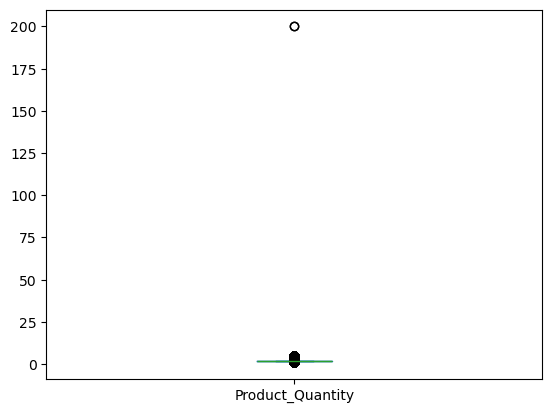

In [42]:
transaction_data_clean['Product_Quantity'].plot(kind = 'box')

In [43]:
# Identify the outliers
transaction_data_clean.query('Product_Quantity > 175')

,Date,Store_Number,Loyalty_Card_Number,Product_Name,Product_Quantity,Total_Sales
69762,2018-08-19,226,226000,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,Dorito Corn Chp Supreme 380g,200,650.00


In [44]:
# Remove the outliers
transaction_data_clean = transaction_data_clean.query('Product_Quantity != 200')

In [45]:
# Product_Quantity outside of IQR 
IQR_PQ = transaction_data_clean['Product_Quantity'].quantile(0.75) - transaction_data_clean['Product_Quantity'].quantile(0.25)
Q1_PQ = transaction_data_clean['Product_Quantity'].quantile(0.75)
Q3_PQ = transaction_data_clean['Product_Quantity'].quantile(0.25)
Lower_Bound_PQ = Q1_PQ - 1.5 * IQR_PQ
Upper_Bound_PQ = Q3_PQ + 1.5 * IQR_PQ

outliers_PQ = transaction_data_clean.query('Product_Quantity > @Upper_Bound_PQ | Product_Quantity < @Lower_Bound_PQ')
outliers_PQ

,Date,Store_Number,Loyalty_Card_Number,Product_Name,Product_Quantity,Total_Sales
1,2019-05-14,1,1307,CCs Nacho Cheese 175g,3,6.30
3,2018-08-17,2,2373,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,2019-05-19,4,4074,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,2019-05-16,4,4149,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
...,...,...,...,...,...,...
264754,2018-10-07,268,268396,Smiths Crinkle Cut Chips Original 170g,1,2.90
264755,2018-10-22,268,268463,Infuzions BBQ Rib Prawn Crackers 110g,1,3.80
264756,2019-04-28,268,268491,Cheezels Cheese Box 125g,1,2.10
264824,2019-03-13,272,272193,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.60


<Axes: >

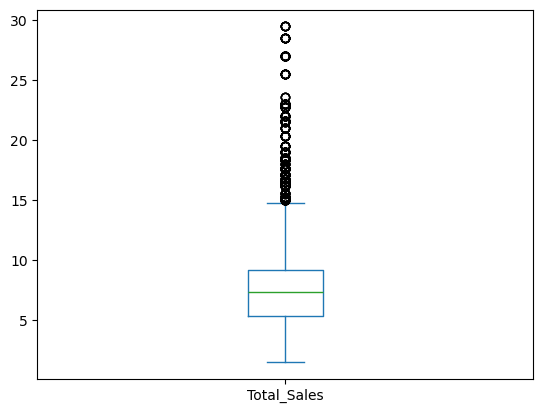

In [46]:
transaction_data_clean['Total_Sales'].plot(kind = 'box')

In [47]:
# Identify the outliers
transaction_data_clean.query('Total_Sales > 15')

,Date,Store_Number,Loyalty_Card_Number,Product_Name,Product_Quantity,Total_Sales
11,2018-08-20,8,8294,Kettle Sensations Siracha Lime 150g,5,23.00
56,2019-05-16,74,74336,GrnWves Plus Btroot & Chilli Jam 180g,5,15.50
72,2018-08-19,96,96203,Smiths Crinkle Original 330g,5,28.50
100,2019-05-20,130,130108,Cobs Popd Sour Crm &Chives Chips 110g,5,19.00
102,2019-05-15,133,133250,Doritos Corn Chips Cheese Supreme 170g,4,17.60
...,...,...,...,...,...,...
258659,2018-08-18,123,123246,Infuzions Thai SweetChili PotatoMix 110g,4,15.20
258715,2018-08-16,194,194381,Kettle Mozzarella Basil & Pesto 175g,4,21.60
258721,2018-08-15,200,200248,Kettle Sensations Camembert & Fig 150g,4,18.40
258726,2018-08-20,203,203253,Thins Potato Chips Hot & Spicy 175g,5,16.50


In [48]:
# Total_Sales outside of IQR 
IQR_TS = transaction_data_clean['Total_Sales'].quantile(0.75) - transaction_data_clean['Total_Sales'].quantile(0.25)
Q1_TS = transaction_data_clean['Total_Sales'].quantile(0.75)
Q3_TS = transaction_data_clean['Total_Sales'].quantile(0.25)
Lower_Bound_TS = Q1_TS - 1.5 * IQR_TS
Upper_Bound_TS = Q3_TS + 1.5 * IQR_TS

outliers_TS = transaction_data_clean.query('Total_Sales > @Upper_Bound_TS | Total_Sales < @Lower_Bound_TS')
outliers_TS

,Date,Store_Number,Loyalty_Card_Number,Product_Name,Product_Quantity,Total_Sales
2,2019-05-20,1,1343,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
11,2018-08-20,8,8294,Kettle Sensations Siracha Lime 150g,5,23.00
13,2018-08-17,13,13213,WW Crinkle Cut Chicken 175g,1,1.70
...,...,...,...,...,...,...
264797,2018-09-02,270,270079,Doritos Cheese Supreme 330g,2,11.40
264802,2019-06-06,270,270079,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.40
264807,2019-01-19,271,271013,Dorito Corn Chp Supreme 380g,2,13.00
264813,2019-01-19,271,271051,WW Crinkle Cut Chicken 175g,2,3.40


#### Summary

Purchase_Behavior table: 
- No outliers to be expected due to the nature of the data.

Transcation_Data table: 
- Product Quantity: removed 2 transactions with 200 product quantity & total_sales of 650 which are not common and way beyond the means.
- Total Sales has many outliers but it is to be expected as this is unit of price and some items could cost much more than other items.

## 3. Data Transformation

### Join / Merge

In [52]:
df_chips = pd.merge(purchase_behavior_clean, transaction_data_clean, on = 'Loyalty_Card_Number', how = 'inner')

In [53]:
df_chips

,Loyalty_Card_Number,Family_Status,Customer_Type,Date,Store_Number,Product_Name,Product_Quantity,Total_Sales
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,Natural Chip Compny SeaSalt175g,2,6.00
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.70
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,Grain Waves Sour Cream&Chives 210G,1,3.60
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,Natural ChipCo Hony Soy Chckn175g,1,3.00
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,WW Original Stacked Chips 160g,1,1.90
...,...,...,...,...,...,...,...,...
264828,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,Grain Waves Sweet Chilli 210g,2,7.20
264829,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20
264830,2370961,OLDER FAMILIES,Budget,2018-10-24,88,Tyrrells Crisps Lightly Salted 165g,2,8.40
264831,2370961,OLDER FAMILIES,Budget,2018-10-27,88,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.20


### Derive New Columns

In [55]:
# New column for the day of the week
df_chips['Day_Of_Week'] = df_chips['Date'].dt.day_name()

In [56]:
print(df_chips['Day_Of_Week'].unique())

['Wednesday' 'Sunday' 'Thursday' 'Friday' 'Tuesday' 'Saturday' 'Monday']


In [57]:
# Sort the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_chips['Day_Of_Week'] = pd.Categorical(df_chips['Day_Of_Week'], categories = day_order, ordered=True)

In [58]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264833 entries, 0 to 264832
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Loyalty_Card_Number  264833 non-null  int64         
 1   Family_Status        264833 non-null  category      
 2   Customer_Type        264833 non-null  category      
 3   Date                 264833 non-null  datetime64[ns]
 4   Store_Number         264833 non-null  int64         
 5   Product_Name         264833 non-null  object        
 6   Product_Quantity     264833 non-null  int64         
 7   Total_Sales          264833 non-null  float64       
 8   Day_Of_Week          264833 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 12.9+ MB


In [59]:
df_chips['Day_Of_Week'] = df_chips['Day_Of_Week'].astype('category')

In [60]:
# New column for the pack size
# Extract the numbers representing grams 
df_chips['Pack_Size'] = df_chips['Product_Name'].str.extract(r"(\d+)")

# Convert to intger type
df_chips['Pack_Size'] = df_chips['Pack_Size'].astype('int')

df_chips['Pack_Size']

0         175
1         150
2         210
3         175
4         160
         ... 
264828    210
264829    150
264830    165
264831    300
264832    330
Name: Pack_Size, Length: 264833, dtype: int32

In [61]:
df_chips['Pack_Size'].describe()

count   264,833.00
mean        182.43
std          64.33
min          70.00
25%         150.00
50%         170.00
75%         175.00
max         380.00
Name: Pack_Size, dtype: float64

In [62]:
# New column for the brand name
# Extract the first word representing the brand names
df_chips['Brand_Name'] = df_chips['Product_Name'].str.split(r"(\w+)").apply(lambda lst: [item for item in lst if item.strip() != ''][0:1]).apply(lambda x: " ".join(x) if x else "")
df_chips['Brand_Name'].unique()

array(['Natural', 'Red', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'Old', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thins', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles', 'French',
       'Infzns', 'Dorito', 'NCC'], dtype=object)

In [63]:
# Standardize the names
df_chips['Brand_Name'].replace({'NCC':'Natural','RRD':'Red','WW':'Woolworths','Infzns':'Infuzions','Dorito':'Doritos','Smith':'Smiths','Snbts':'Sunbites','Grain':'GrnWves'}, inplace = True)
df_chips['Brand_Name'].unique()

array(['Natural', 'Red', 'GrnWves', 'Woolworths', 'Cheetos', 'Infuzions',
       'Doritos', 'Old', 'Smiths', 'Kettle', 'CCs', 'Tostitos', 'Cobs',
       'Burger', 'Thins', 'Tyrrells', 'Cheezels', 'Twisties', 'Sunbites',
       'Pringles', 'French'], dtype=object)

In [64]:
# Price per item
df_chips['Item_Price'] = df_chips['Total_Sales'] / df_chips['Product_Quantity']
df_chips

,Loyalty_Card_Number,Family_Status,Customer_Type,Date,Store_Number,Product_Name,Product_Quantity,Total_Sales,Day_Of_Week,Pack_Size,Brand_Name,Item_Price
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,Natural Chip Compny SeaSalt175g,2,6.00,Wednesday,175,Natural,3.00
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.70,Sunday,150,Red,2.70
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,Grain Waves Sour Cream&Chives 210G,1,3.60,Thursday,210,GrnWves,3.60
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,Natural ChipCo Hony Soy Chckn175g,1,3.00,Friday,175,Natural,3.00
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,WW Original Stacked Chips 160g,1,1.90,Friday,160,Woolworths,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,Grain Waves Sweet Chilli 210g,2,7.20,Saturday,210,GrnWves,3.60
264829,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,Monday,150,Kettle,4.60
264830,2370961,OLDER FAMILIES,Budget,2018-10-24,88,Tyrrells Crisps Lightly Salted 165g,2,8.40,Wednesday,165,Tyrrells,4.20
264831,2370961,OLDER FAMILIES,Budget,2018-10-27,88,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.20,Saturday,300,Old,5.10


#### Summary

- Joined the 2 tables: Purchase_Behavior & Transaction_Data
- Added new columns: Day_of_Week, Pack-Size, and Brand_Name

### Data Export

In [67]:
df_chips

,Loyalty_Card_Number,Family_Status,Customer_Type,Date,Store_Number,Product_Name,Product_Quantity,Total_Sales,Day_Of_Week,Pack_Size,Brand_Name,Item_Price
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,Natural Chip Compny SeaSalt175g,2,6.00,Wednesday,175,Natural,3.00
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.70,Sunday,150,Red,2.70
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,Grain Waves Sour Cream&Chives 210G,1,3.60,Thursday,210,GrnWves,3.60
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,Natural ChipCo Hony Soy Chckn175g,1,3.00,Friday,175,Natural,3.00
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,WW Original Stacked Chips 160g,1,1.90,Friday,160,Woolworths,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,Grain Waves Sweet Chilli 210g,2,7.20,Saturday,210,GrnWves,3.60
264829,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.20,Monday,150,Kettle,4.60
264830,2370961,OLDER FAMILIES,Budget,2018-10-24,88,Tyrrells Crisps Lightly Salted 165g,2,8.40,Wednesday,165,Tyrrells,4.20
264831,2370961,OLDER FAMILIES,Budget,2018-10-27,88,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.20,Saturday,300,Old,5.10


In [68]:
df_chips.to_csv(r'C:\Users\thang\OneDrive\Desktop\Chips Analysis\2. Data Sources\Clean\Clean_Chips_Data.csv', index = False)